## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [ ]:
1. structed data is data that is relativly easy to understand just from where it is, EX:excel sheets, Unstructured data is data that is confusing to look at and 
needs more clear ways to read it, EX:social media, semi stucted is data that is somehwere inbetween structured and unstructed, EX:emails


In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [73]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)

In [75]:
show(DF)

In [77]:
DF.shape

(10000, 55)

### Check Observations and Variables

**Q1** How many **observations** are there? 10000

**Q2** How many **variables** are there? 55

In [79]:
# Enter your code here to find the data shape
DF.shape

(10000, 55)

**(Double CLick Here to answer the questions))**
1. 10,000
2. 55

### Reduce the number of variables

In [82]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

show(DF)

**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units? 
3. Is the data numerical? If so is it continuous or discrete?
4. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

**(Double Click Here
loan- numerical/continuous, intrest-numerical/continous,term- numerical/discrete, Grade-catergorical/ordinal, state-categorical/nominal, income-numerical/continuous, ownership- categorical/nominal, debt- numerical/continuous

### Here is Example Code for a simple Histogram

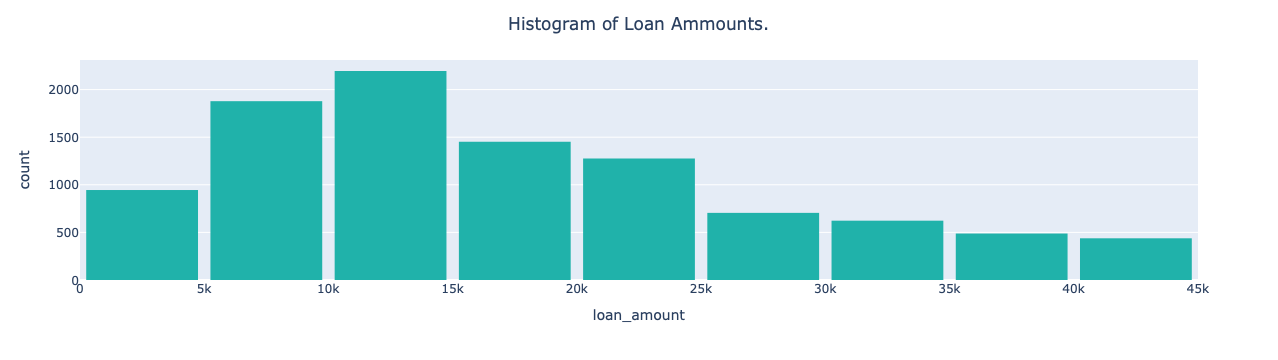

In [85]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


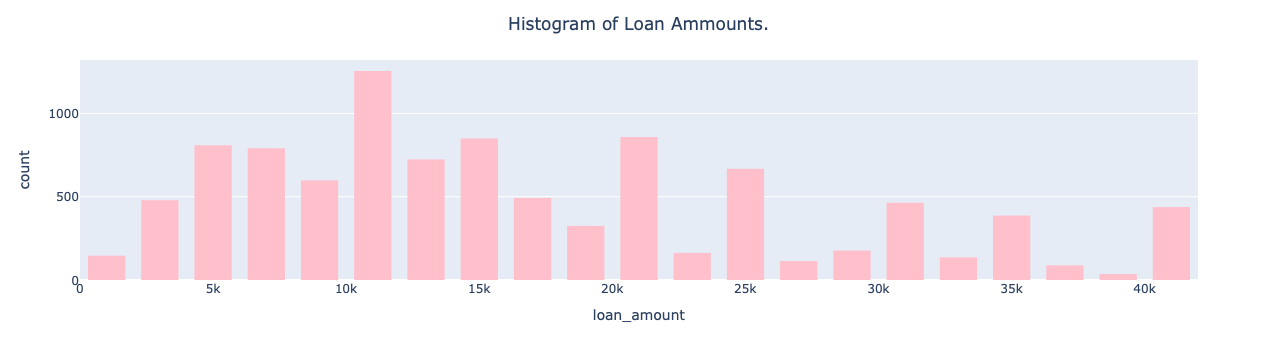

In [87]:
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=20,
                   x='loan_amount',
                   color_discrete_sequence=['pink'])

fig.update_layout(bargap=0.3,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**(Double Click here to answer the questions)**
It seems for this specific data that less bins makes a more clear bar graph with a consistent skew to the right. with more bins there is more obvious outliers. i think for the purpose of getting this data across less bins makes more sense.

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


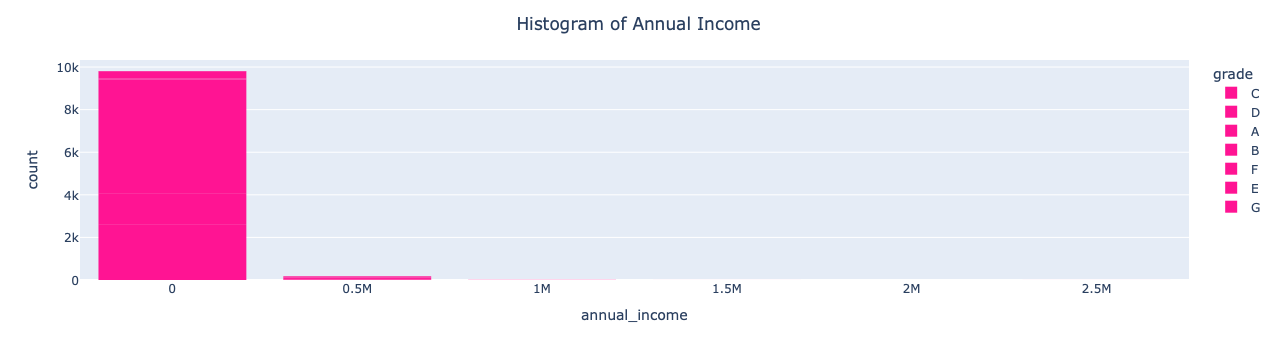

In [89]:
# Your code here
fig = px.histogram(DF,
                   nbins=5,
                   x='annual_income',
                   color='grade',
                   color_discrete_sequence=['deeppink'])

fig.update_layout(bargap=0.2,
                  title='Histogram of Annual Income',
                  title_x=0.5)
fig.show()

### Here is example code for a histogram with a box plot included.

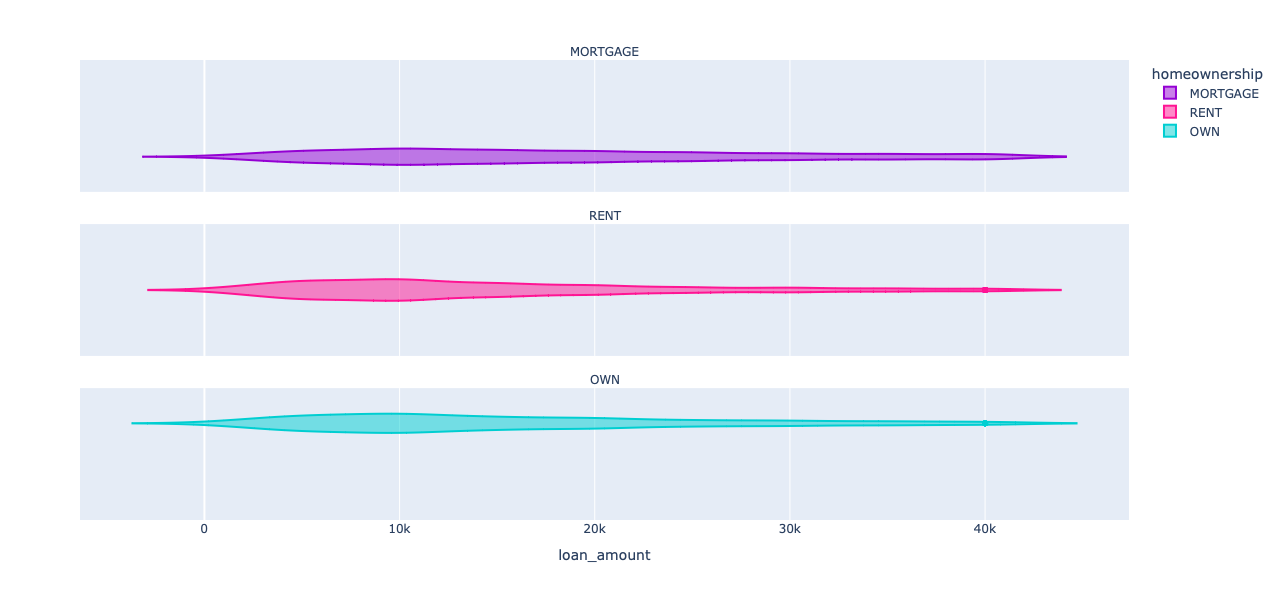

In [91]:
fig = px.violin(DF,
                x='loan_amount', 
                facet_col='homeownership',
                facet_col_wrap=1,
                color='homeownership',
                color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                width=800,
                height=600)

# This just makes the labels look a bit nicer
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

**(Double Click Here)**
the violen plots are all mostly skewed to the right with longer tails to the right and short tails to the left

In [93]:
counts = DF['homeownership'].value_counts()
show(counts)

**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [95]:
## Your code here
counts = DF['annual_income'].value_counts()
show(counts)

### Here is example code for a bar plot

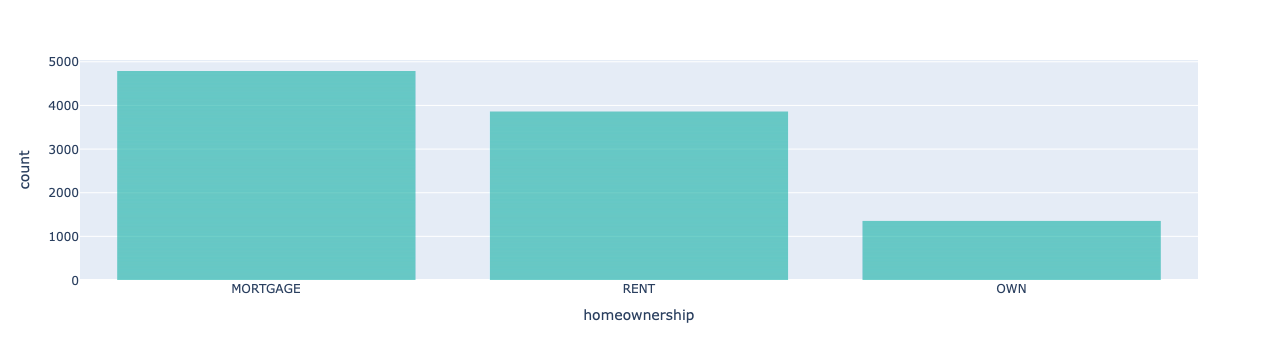

In [97]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

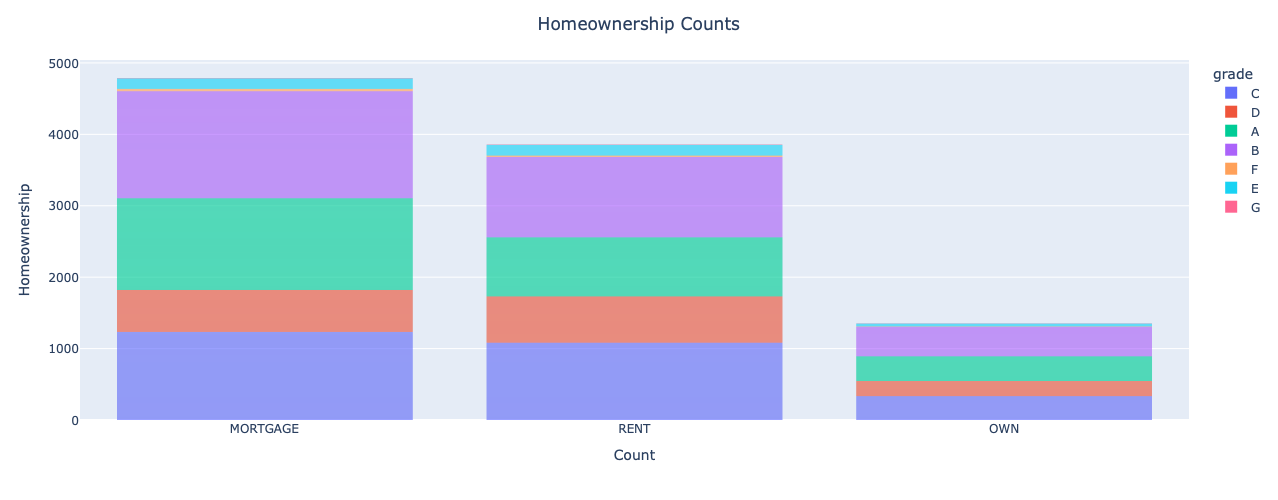

In [99]:
# Your code herefig = px.bar(DF,
fig = px.bar(DF,
            x='homeownership',
            color='grade')
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='Homeownership Counts',
                  title_x=0.5,
                  xaxis_title="Count",
                  yaxis_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()

**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

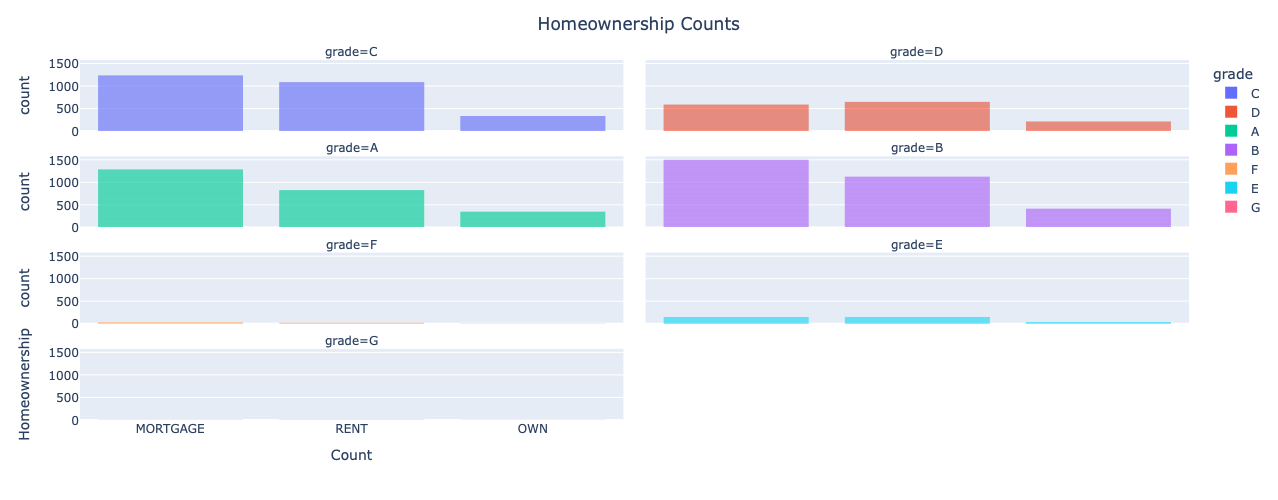

In [103]:
# Your code here
fig = px.bar(DF,
            x='homeownership',
            facet_col='grade',
             facet_col_wrap=2,
            color='grade')
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='Homeownership Counts',
                  title_x=0.5,
                  xaxis_title="Count",
                  yaxis_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()

### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [105]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
show(DF_new)

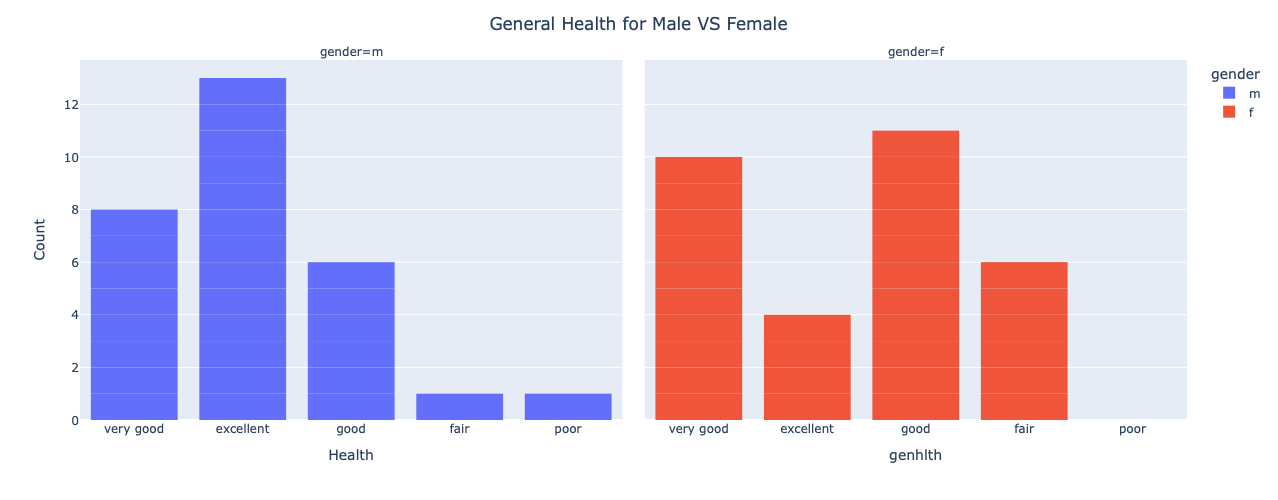

In [125]:
fig = px.bar(DF_new,
            x='genhlth',
            facet_col='gender',
             facet_col_wrap=2,
            color='gender')
color_discrete_map={'m': 'darkviolet', 
                                'f': 'deeppink'},
fig.update_traces(dict(marker_line_width=0))

fig.update_layout(title='General Health for Male VS Female',
                  title_x=0.5,
                  xaxis_title="Health",
                  yaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)
fig.show()